In [1]:
%load_ext autoreload
%autoreload 2

In [94]:
from nn.nn import NeuralNetwork
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [150]:
#load in digits dataset 

#digits.data is shape (1794, 64) --> 64 is flattened image pixels 
digits = load_digits()
  
#split into train and test sets 
X_train, X_test, y_train, y_test=train_test_split(digits.data, digits.target, train_size=0.6, random_state=3)
X_train.shape

(1078, 64)

In [159]:
example_NN = NeuralNetwork(nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
                                      {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}],
                            lr = 0.0005, seed = 3, batch_size = 100, epochs = 500, loss_function='mse')


#params are arrays of W1-Wx where x is feature number
#and also an array for b1 

In [160]:
#YOU FOOL
#BC IT'S AN AUTOENCODER INPUT AND OUTPUT SHOULD BE THE SAME GLAKSDJF'LAKSDFJ'
per_epoch_loss_train, per_epoch_loss_val=example_NN.fit(X_train, X_train, X_test, X_test)

epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400


In [161]:
#let's ignore the fact that there is something very wrong 

In [162]:

#(per_epoch_loss_val)

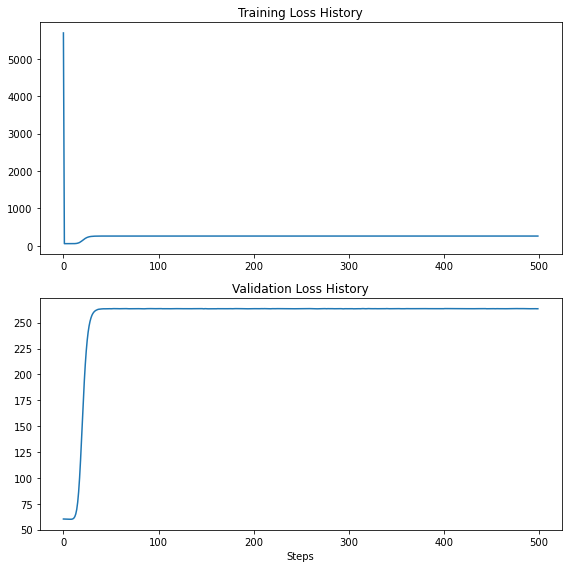

In [163]:
#taken from hw7

fig, axs = plt.subplots(2, figsize=(8, 8))
axs[0].plot(np.arange(len(per_epoch_loss_train)), per_epoch_loss_train)
axs[0].set_title('Training Loss History')
axs[1].plot(np.arange(len(per_epoch_loss_val)), per_epoch_loss_val)
axs[1].set_title('Validation Loss History')
plt.xlabel('Steps')
fig.tight_layout()
plt.show()